In [1]:
from utils import (
    get_tiger_mortality_data,
    get_tiger_reserve_data,
    get_tiger_occurrences_data,
)

### Fetch the data

In [2]:
tiger_reserve_data = get_tiger_reserve_data()
tiger_mortality_data = get_tiger_mortality_data()

In [3]:
tiger_occurrence_data = get_tiger_occurrences_data()

Fetching data from 0 to 300
Fetching data from 300 to 600
Fetching data from 600 to 900
Fetching data from 900 to 1200
Fetching data from 1200 to 1500
Fetching data from 1500 to 1800
Fetching data from 1800 to 2100
Fetching data from 2100 to 2400


### Highlight the biases in the occurrence data
    - The data is crowd sourced, so there are biases in the data
    - Most prominent being, popular national parks are more likely to be reported & the year the project was active

#### Year-Wise Bias

<AxesSubplot:xlabel='year'>

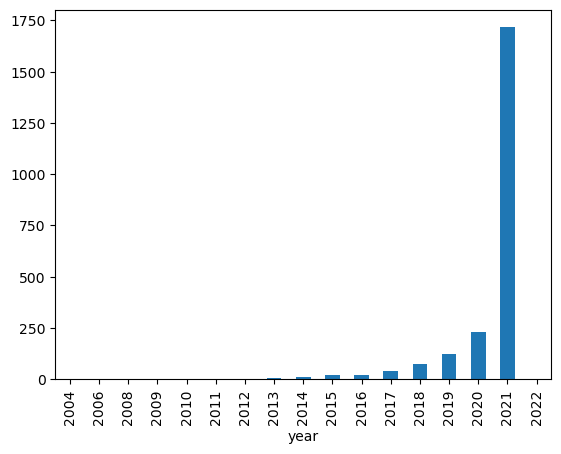

In [4]:
# get occurrence data by year:
tiger_occurrence_data.groupby("year").key.count().plot(kind="bar")

#### Location Biases
    

<AxesSubplot:xlabel='stateProvince'>

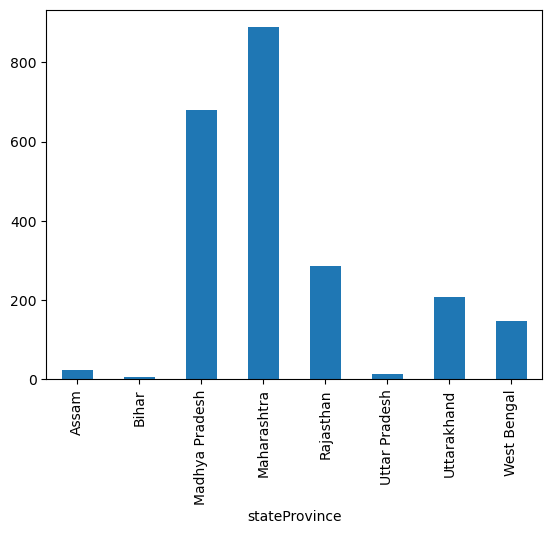

In [5]:
# get occurrence data by state:
tiger_occurrence_data.groupby("stateProvince").key.count().plot(kind="bar")

<AxesSubplot:xlabel='county'>

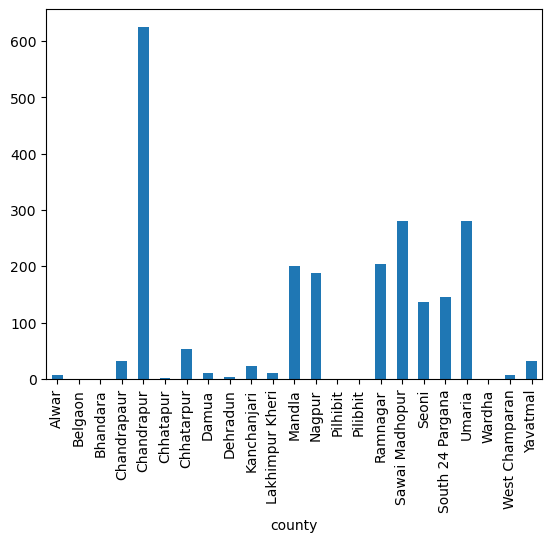

In [6]:
# Get occurrence data by province:
tiger_occurrence_data.groupby("county").key.count().plot(kind="bar")

In [12]:
# Plot on folium map as clusters:
import folium
from folium.plugins import MarkerCluster


m = folium.Map(location=[20, 70], zoom_start=4)
marker_cluster = MarkerCluster().add_to(m)

In [13]:
def add_marker(row):
    if row["added_to_map"]:
        print("Already added")
        return row["added_to_map"]
    folium.Marker([row["decimalLatitude"], row["decimalLongitude"]]).add_to(
        marker_cluster
    )
    return True

In [14]:
tiger_occurrence_data["added_to_map"] = False
tiger_occurrence_data["added_to_map"] = tiger_occurrence_data.apply(add_marker, axis=1)

In [16]:
# Uncomment below to see the map:
# m